In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


**1. What is the default geom associated with `stat_summary()`?How could you rewrite the previous plot to use that geom function instead of the stat function?**

The default feom associated with `stat_summary` is `geom_pointrange`

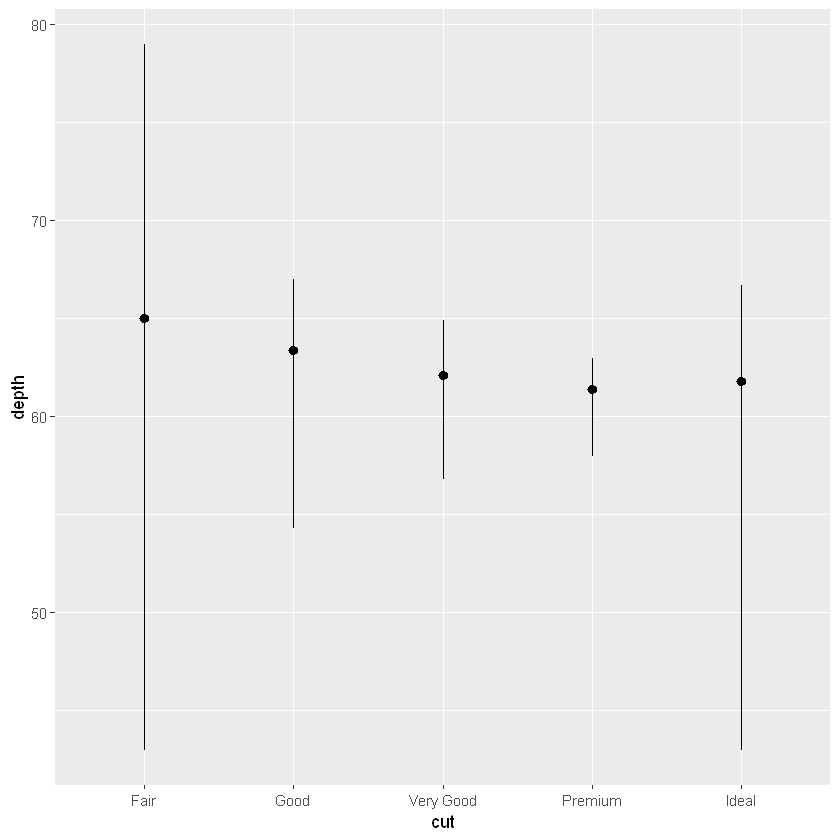

In [2]:
ggplot(data = diamonds) + 
    stat_summary( mapping = aes(x = cut, y = depth),fun.ymin = min,fun.ymax = max,fun.y = median)

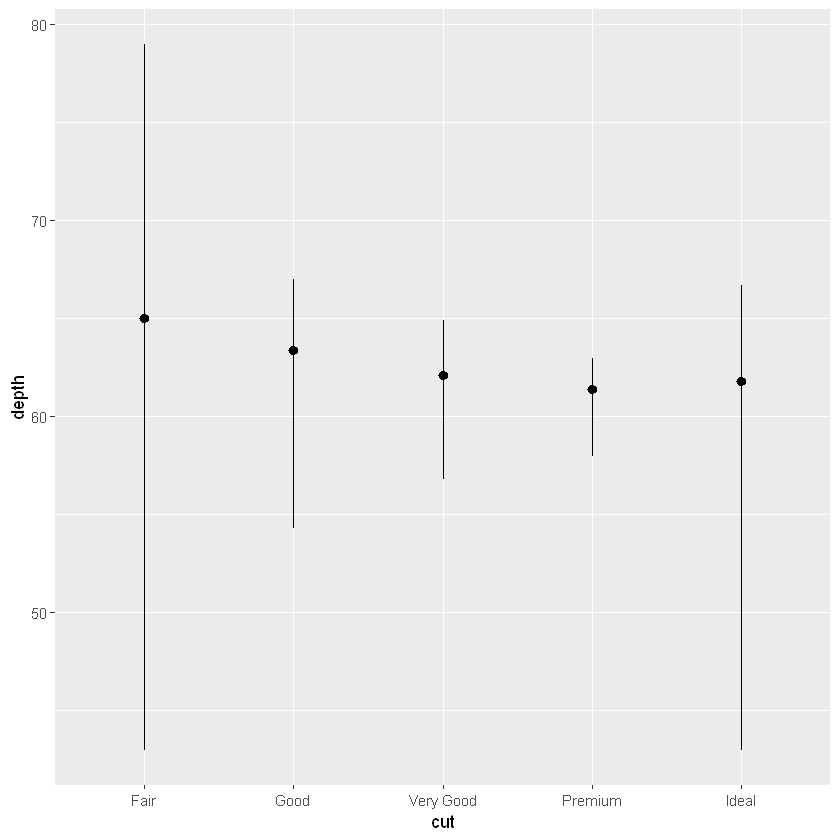

In [3]:
ggplot(data = diamonds)+
       geom_pointrange(mapping = aes(x = cut, y = depth), stat = "summary", fun.ymin = min, fun.ymax = max, fun.y = median )

**2. What does geom_col() do? How is it different to geom_bar()?**

_The `geom_col()`has the default stat `stat_identity` that renders the height of the bars to represent the values in the data.`geom_bar()`has as default the stat `stat_count()`that makes the height of the bar proportional to the number of cases in each group (or if the weight aesthetic is supplied, the sum of the weights)_

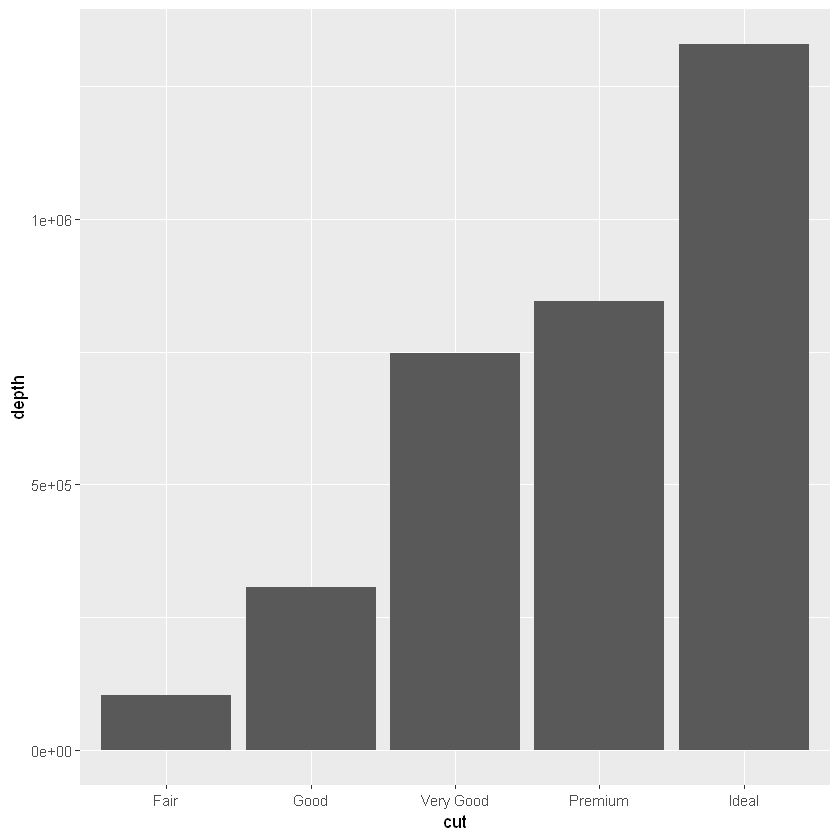

In [4]:
ggplot(data = diamonds, mapping = aes(x = cut, y = depth))+
    geom_col()

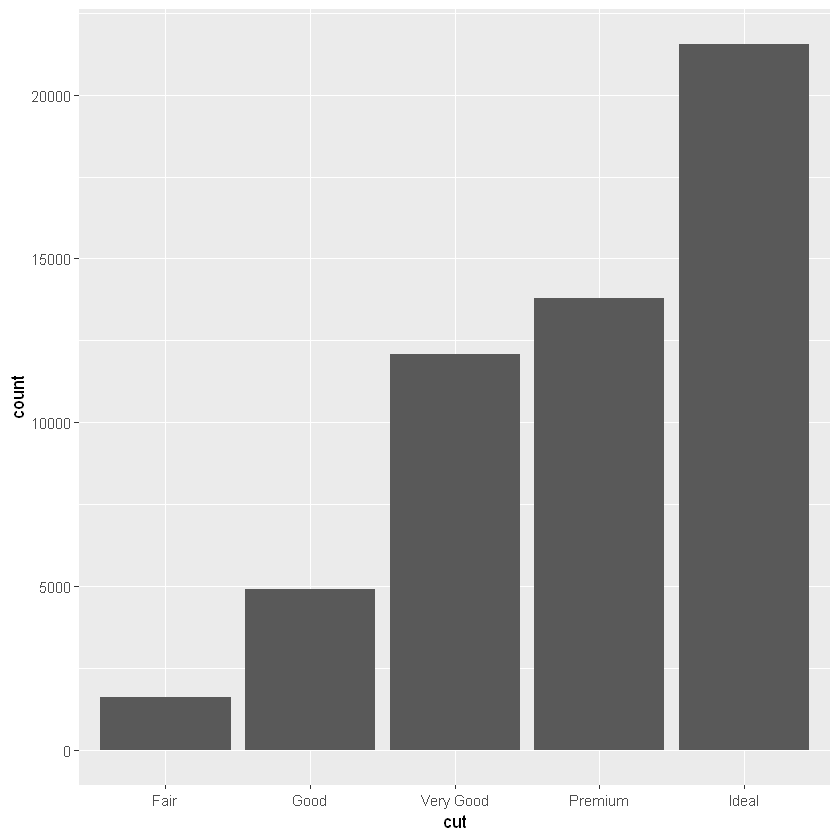

In [5]:
ggplot(data = diamonds, mapping = aes(x = cut))+
    geom_bar()

**3. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?**

```geom    stat
area        identity
ribbon      identity
bar         count
col         identity
bin2d       bind2d
blank       identity
boxplot     boxplot
contour     contour
count       sum
crossbar    identity
errorbar    identity
errorbarh   identity
linerange   identity
pointrange  identity
curve       identity
segment     identity
density     density
density_2d  density2d
freqpoly    bin
histogram   bin
hex         binhex
jitter      identity
label       identity
path        identity
line        identity
map         identity
point       identity
polygon     identity
quantile    quantile
raster      identity
rect        identity
rug         identity
smooth      smooth
spoke       spoke
step        identity
text        identity
tile        identity
violin      ydensity```

_Most have the default stat as `stat_identity()`_

**4. What variables does stat_smooth() compute? What parameters control its behavior?**

In [6]:
help(stat_smooth)

geom_smooth {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes() or aes_(). If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot(). A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify() for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame, and will be used as the layer data. A function can be created from a formula (e.g. ~ head(.x, 10))."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
...,"Other arguments passed on to layer(). These are often aesthetics, used to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
method,"Smoothing method (function) to use, accepts either a character vector, e.g. ""auto"", ""lm"", ""glm"", ""gam"", ""loess"" or a function, e.g. MASS::rlm or mgcv::gam, stats::lm, or stats::loess. For method = ""auto"" the smoothing method is chosen based on the size of the largest group (across all panels). stats::loess() is used for less than 1,000 observations; otherwise mgcv::gam() is used with formula = y ~ s(x, bs = ""cs""). Somewhat anecdotally, loess gives a better appearance, but is O(N^2) in memory, so does not work for larger datasets. If you have fewer than 1,000 observations but want to use the same gam() model that method = ""auto"" would use, then set method = ""gam"", formula = y ~ s(x, bs = ""cs"")."
formula,"Formula to use in smoothing function, eg. y ~ x, y ~ poly(x, 2), y ~ log(x)"
se,"Display confidence interval around smooth? (TRUE by default, see level to control.)"
na.rm,"If FALSE, the default, missing values are removed with a warning. If TRUE, missing values are silently removed."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes. It can also be a named logical vector to finely select the aesthetics to display."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders()."


_The computed variables are:_
```y - predicted value
ymin - lower pointwise confidence interval around the mean
ymax - upper pointwise confidence interval around the mean
se - standard error```

_Parameters are:_<br>
`x`, `y`, `alpha`, `colour`, `fill`, `group`, `linetype`, `size`, `weight`, `ymax`, `ymin`

**5. In our proportion bar chart, we need to set group = 1. Why? In other words what is the problem with these two graphs?**

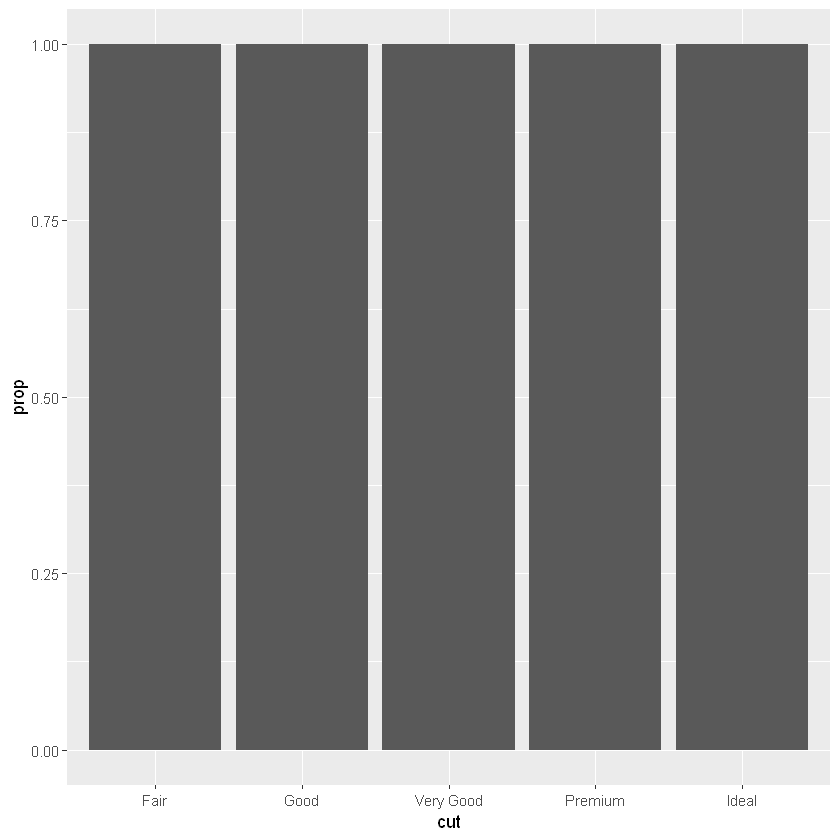

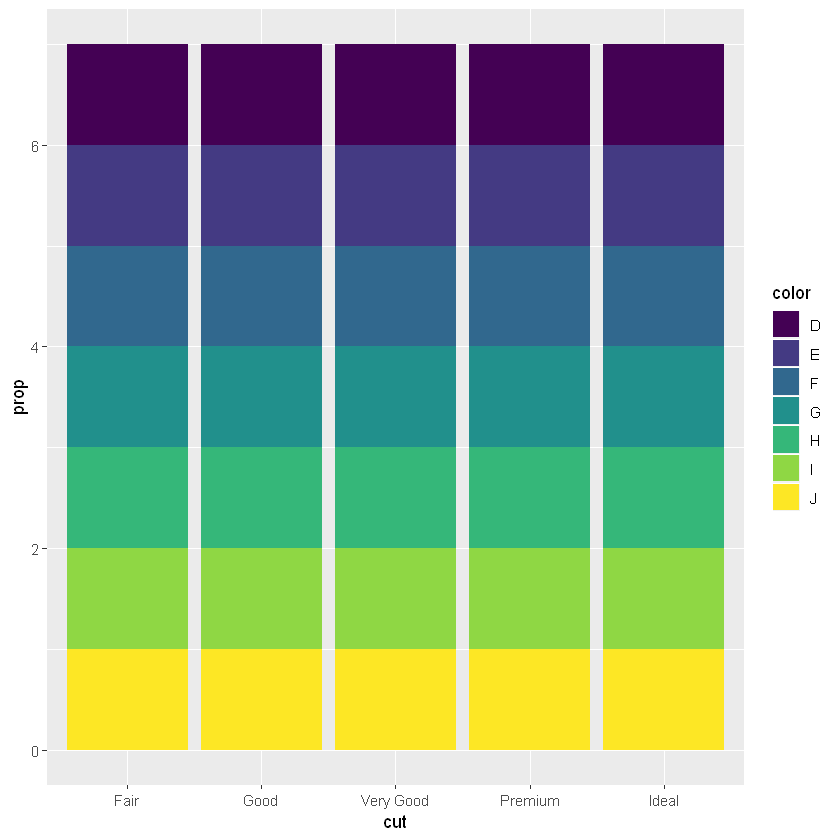

In [7]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, y = ..prop..))
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = color, y = ..prop..))

_The cut category is calculated separately since the default stat for `geom_bar` that is `stat_count()` calculates a full proportion of 1 for all categories if group is not set to `group = 1`. If set it renders cut as a proportion of diamond numbers_

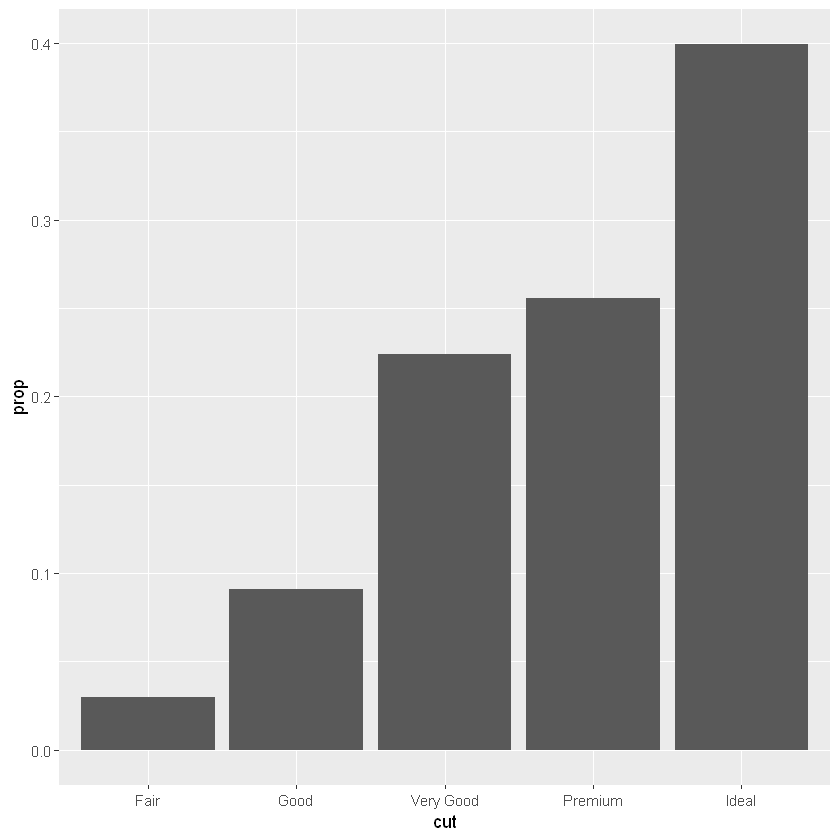

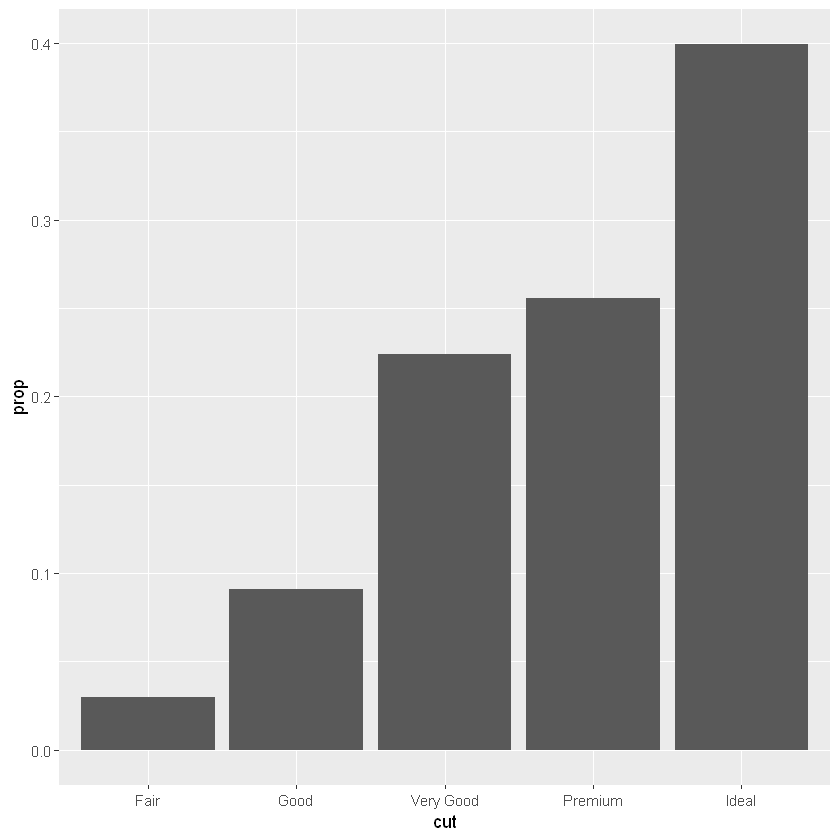

In [8]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, y = ..prop.., group= 1))
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = color, y = ..prop.., group = 1))